In [1]:
from utils2 import exactTest, preparePandas, memoryPlotSNS
import numpy as np
import time
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def runTestInBatch(Abatch, Bbatch, sample_n, w):
    allPval = list()
    batchSize = len(Abatch)
    for j in range(0, batchSize, sample_n):
        Abatch_div = Abatch[j:j+sample_n]
        Bbatch_div = Bbatch[j:j+sample_n]
        pExactListNorm = exactTest(Abatch_div, Bbatch_div, w, True)
        allPval.append(pExactListNorm)
    return allPval

def getTimeSeries(setNList, sampleNList, NwList, batchsize, sampleRangeMax):
    ALLTimeList = list()
    for set_n, sample_n, w in zip(setNList, sampleNList, NwList):
        allTimes = list()
        AN, BN = [np.random.normal(0,1,set_n) for i in range(sampleRangeMax)], [np.random.normal(0,1,set_n) for i in range(sampleRangeMax)]
        for i in range(0, len(AN), batchsize):
            Abatch = AN[:i+batchsize]
            Bbatch = BN[:i+batchsize]
            print("Batch len {}".format(len(Abatch)))
        
            start = time.time()
            allPval = runTestInBatch(Abatch, Bbatch, sample_n, w)
            end = time.time()
            dt = end - start
            allTimes.append(dt)
            print("------------")
        ALLTimeList.append(allTimes)
    return ALLTimeList
    
def getScatterData(sN,tList, maxRange, batchSize):
    y=list()
    x=list()
    for i, j in enumerate(range(0, maxRange, batchSize)):
        if j % sN ==0 and j!=0:
            y.append(j)
            x.append(tList[i-1])
    return x, y

def getXrangeData(setSize, maxRange, batchS):
    AN, BN = [np.random.normal(0,1,setSize) for i in range(maxRange)], [np.random.normal(0,1,setSize) for i in range(maxRange)]
    batchList = list()
    for i in range(0, len(AN), batchS):
        Abatch = AN[:i+batchS]
        batchList.append(len(Abatch))

    return batchList

In [3]:
def getPATH(path, suffix, prefix):
    return path + '/'+ suffix + '/' + prefix

In [4]:
path = "figures/paralellVsFastApprox"

# Set size 500 and sample size up to 24

In [5]:
setN = [500,500,500]
sampleN = [2,20,4]
W = [2000,200,1000]
batchsize = 1
sampleRangeMax =24

In [6]:
#LargeSetSize = getTimeSeries(setN, sampleN, W, batchsize, sampleRangeMax)

In [7]:
#pickle.dump(ALLTime2, open("data/memeroytest/LargeSetSize", "wb"))
LargeSetSize = pickle.load(open("data/memeroytest/LargeSetSize", "rb"))

In [8]:
batchList = getXrangeData(setN[0], sampleRangeMax, batchsize)

In [9]:
data_0 = preparePandas(batchList, LargeSetSize[0], "$n_{w}=2000$")
data_1 = preparePandas(batchList, LargeSetSize[1], "$n_{w}=200$")
data_2 = preparePandas(batchList, LargeSetSize[2], "$n_{w}=1000$")

In [10]:
data = data_0 + data_1 + data_2
pdData = pd.DataFrame(data, columns=['Experiment','Sample size', 'time(s)',])

In [11]:
x0, y0 = getScatterData(sampleN[0],LargeSetSize[0], sampleRangeMax, 1)
x1, y1 = getScatterData(sampleN[1],LargeSetSize[1], sampleRangeMax, 1)
x2, y2 = getScatterData(sampleN[2],LargeSetSize[2], sampleRangeMax, 1)

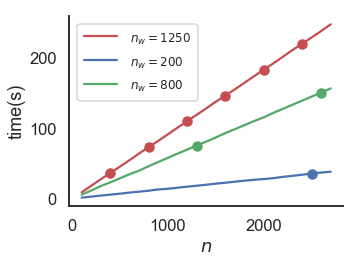

In [22]:
memoryPlotSNS(pdData, log=False)
plt.scatter(y0, x0, marker="o", color="r")
plt.scatter(y1, x1, marker="o", color="b")
plt.scatter(y2, x2, marker="o", color="g")
plt.savefig("figures/memoryPlot/largeN")

# Set size 40 and sample size up to 2700


In [13]:
batchsize = 100
setN = [40,40,40]
sampleN = [400,2500,650]
W = [1250,200,800]
sampleRangeMax= 2700


In [14]:
#ALLTimeList = getTimeSeries(setN, sampleN, W, batchsize, sampleRangeMax)

In [15]:
#pickle.dump(ALLTimeList, open("data/memeroytest/smallSetSize", "wb"))
ALLTimeList = pickle.load(open("data/memeroytest/smallSetSize", "rb"))

In [16]:
batchList = getXrangeData(setN[0], sampleRangeMax, batchsize)


In [17]:
data_0 = preparePandas(batchList, ALLTimeList[0], "$n_{w}=1250$")
data_1 = preparePandas(batchList, ALLTimeList[1], "$n_{w}=200$")
data_2 = preparePandas(batchList, ALLTimeList[2], "$n_{w}=800$")

In [18]:
data = data_0 + data_1 + data_2
pdData = pd.DataFrame(data, columns=['Experiment','Sample size', 'time(s)',])

In [19]:
x0, y0 = getScatterData(sampleN[0],ALLTimeList[0], sampleRangeMax, 100)
x1, y1 = getScatterData(sampleN[1],ALLTimeList[1], sampleRangeMax, 100)
x2, y2 = getScatterData(sampleN[2],ALLTimeList[2], sampleRangeMax, 100)

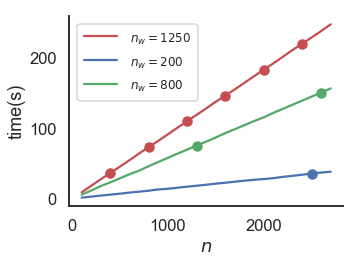

In [21]:

memoryPlotSNS(pdData, log=False)
plt.scatter(y0, x0, marker="o", color="r")
plt.scatter(y1, x1, marker="o", color="b")
plt.scatter(y2, x2, marker="o", color="g")
plt.savefig("figures/memoryPlot/smallN")